In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class Reshape(nn.Module):
     def forward(self, x):
         return x.reshape(-1, 1, 28, 28)
#-1代表让torch自己计算,这边就表示让torch自己计算有多少个批量大小

In [3]:
net = nn.Sequential(
    Reshape(),
    nn.Conv2d(1, 6, kernel_size = 5, padding = 2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size = 2, stride = 2),
    nn.Conv2d(6, 16, kernel_size = 5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size = 2, stride = 2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)

计算准确率

训练

In [4]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):

    #初始化权重
    def init_weight(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weight)

    #将网络移动到指定device运行
    print("train on:", device)
    net.to(device)

    #定义loss和优化方法
    optimizer = torch.optim.SGD(net.parameters(), lr)
    loss = nn.CrossEntropyLoss()

    #开始训练
    for epoch in range(num_epochs):
        net.train()

        for x, y in train_iter:

            x = x.to(device)
            y = y.to(device)

            y_hat = net(x)
            l = loss(y_hat, y)
            optimizer.zero_grad() #做反向传播之前要先清空梯度
            l.backward()
            optimizer.step() #做一次优化

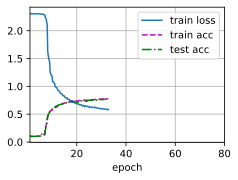

In [ ]:
lr, num_epochs, batch_size = 0.1, 80, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
lr, num_epochs, batch_size = 0.1, 80, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)